# **import the needed libraries**

In [1]:
import tensorflow  as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import layers,datasets,optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# **reading the data and divide it to X and Y**

In [2]:
data=pd.read_csv(r"E:\train.csv")
data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.drop(columns='label')
X=X.values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
X.shape

(42000, 784)

In [6]:
Y=data['label'].values
Y.shape
y = to_categorical(Y, num_classes=10)



4


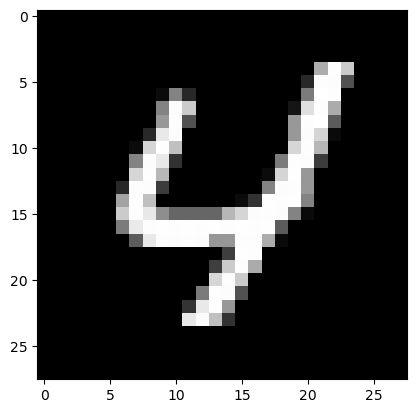

In [9]:
#showing one sample
sample=X[450]
sample=sample.reshape(28,28)
plt.imshow(sample,cmap="gray")
print(Y[450])

**train and test splitting**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**normalize the values**

In [12]:
x_train = x_train/255
x_test = x_test/255

In [14]:
print("Shape of x_train:", x_train.shape)
print("Shape of ytrain:", y_train.shape)


Shape of x_train: (33600, 784)
Shape of ytrain: (33600, 10)


# building the model architecture and train it

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(124, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [16]:
Optimizer = optimizers.Adam()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])


In [17]:
history=model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)


Epoch 1/10


263/263 [==============================] - 12s 29ms/step - loss: 0.3023 - accuracy: 0.9118
Epoch 2/10
263/263 [==============================] - 8s 29ms/step - loss: 0.1119 - accuracy: 0.9663
Epoch 3/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0666 - accuracy: 0.9786
Epoch 4/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0500 - accuracy: 0.9836
Epoch 5/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 6/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0261 - accuracy: 0.9917
Epoch 7/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 8/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 9/10
263/263 [==============================] - 8s 30ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/10
263/263 [==============================] - 9s 34ms/step - loss: 0.0185 - acc

**showing some figures**

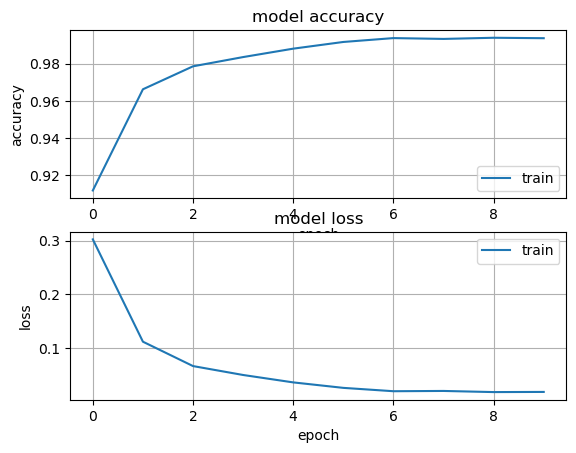

In [18]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper right')


# evaluating the model

In [28]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


263/263 [==============================] - 2s 7ms/step - loss: 0.0954 - accuracy: 0.9769
Test loss: 0.09543829411268234
Test accuracy: 0.9769047498703003


# Prediction

In [58]:
import numpy as np

sample1 = x_train[1] / 255  
sample1 = np.expand_dims(sample1, axis=0)

predictions = model.predict(sample1)
predicted_label = np.argmax(predictions)
print("Predicted Label:", predicted_label)
print("Actual Label:", y_train[1])  

1/1 [==============================] - 0s 56ms/step
Predicted Label: 5
Actual Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model.save('Handwritten Digit recognition.h5')